In [44]:
import h5py
import matplotlib.pyplot as plt
import numpy as np

In [45]:
with h5py.File('../data/chease/ns128/topovisdata-0-0.h5') as f:
    R = f['R'][()]
    Z = f['Z'][()]
    POT = f['Poten'][()]

r2d = np.reshape(R, (128,128))
z2d = np.reshape(Z, (128,128))
pot2d = np.reshape(POT, (128,128))

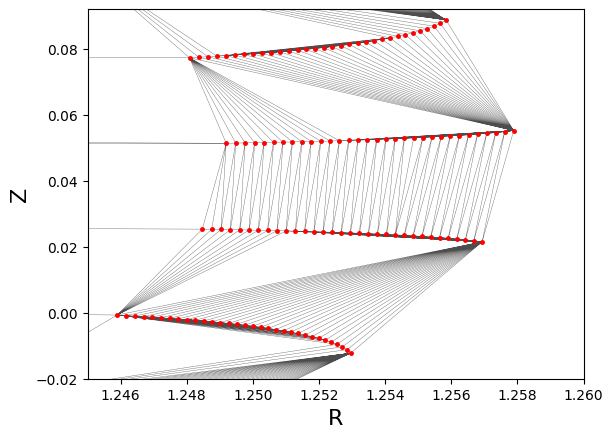

In [ ]:
fig, ax = plt.subplots()

slc = np.s_[0:None:4, :]

r = np.ravel(r2d[slc])
z = np.ravel(z2d[slc])

ax.set_ylim(-0.02, 0.092)
ax.set_xlim(1.245, 1.26)
ax.triplot(r, z, lw=0.25, c='0.3')
ax.scatter(r, z, c='r', marker='.', edgecolors='0', lw=0, s=50)
#ax.set_aspect('equal')

ax.set_xlabel('R', fontsize=16)
ax.set_ylabel('Z', fontsize=16)

plt.savefig('../figs/numerical_artifacts.svg')